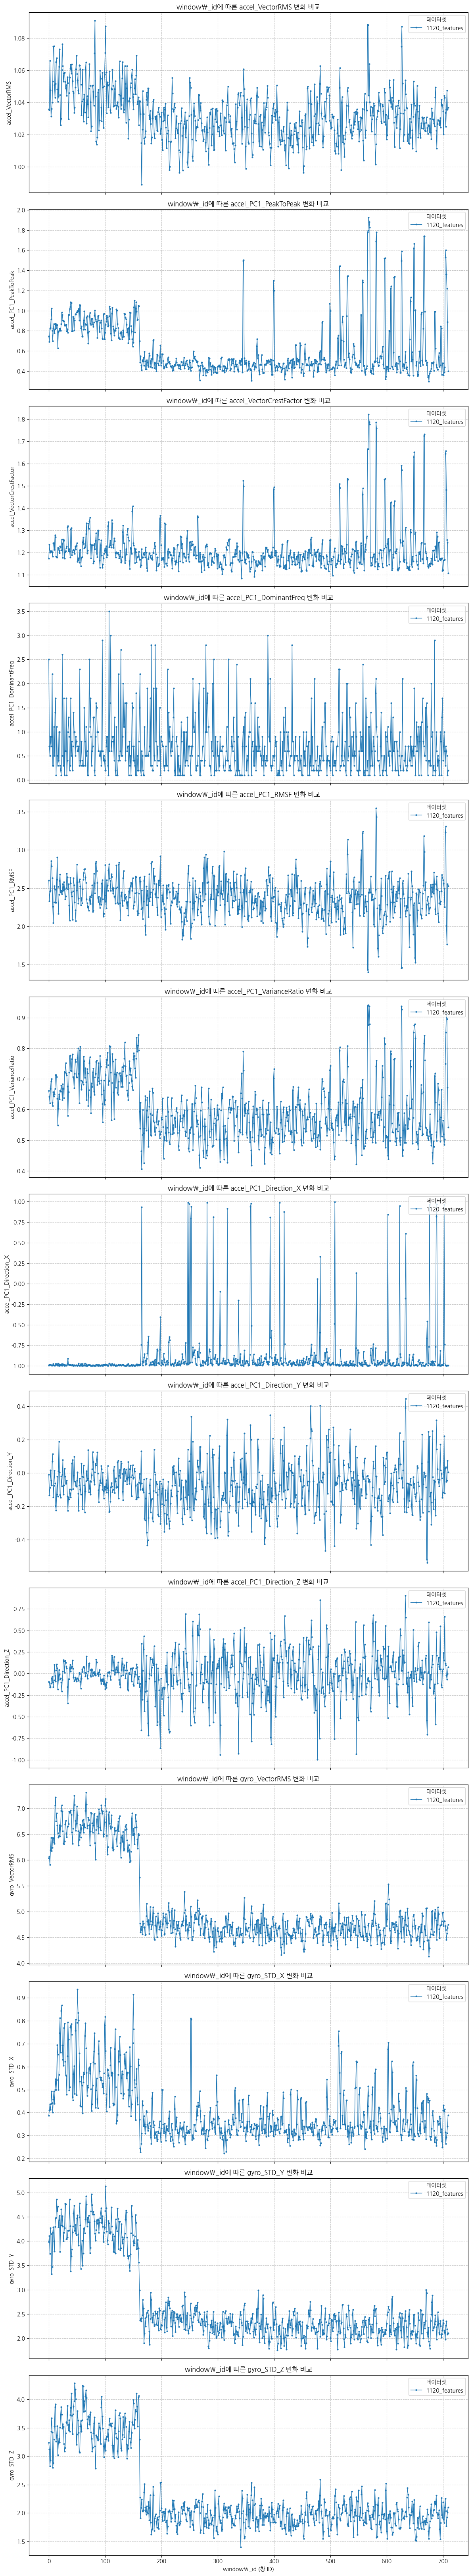

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import koreanize_matplotlib

# -------------------------------------------------------------------------
# 💡 설정: 이곳에 원하는 속성 이름을 추가하여 차트 확장이 가능합니다.
# -------------------------------------------------------------------------
features_to_plot = ['accel_VectorRMS', 'accel_PC1_PeakToPeak', 'accel_VectorCrestFactor', 'accel_PC1_DominantFreq',
                    'accel_PC1_RMSF', 'accel_PC1_VarianceRatio', 'accel_PC1_Direction_X', 'accel_PC1_Direction_Y',
                    'accel_PC1_Direction_Z', 'gyro_VectorRMS', 'gyro_STD_X', 'gyro_STD_Y', 'gyro_STD_Z']
# 예시: features_to_plot = ['accel_VectorRMS', 'gyro_VectorRMS', 'pressure_Mean']

"""
features_to_plot = ['accel_VectorRMS', 'accel_PC1_PeakToPeak', 'accel_VectorCrestFactor', 'accel_PC1_DominantFreq',
                    'accel_PC1_RMSF', 'accel_PC1_VarianceRatio', 'accel_PC1_Direction_X', 'accel_PC1_Direction_Y',
                    'accel_PC1_Direction_Z', 'gyro_VectorRMS', 'gyro_STD_X', 'gyro_STD_Y', 'gyro_STD_Z']
"""

# 파일 정의 (차트에 포함하고자 하는 파일 리스트)
file_list = ["data/processed/1120_features.csv"]#, "data/processed/1120_features_S1.csv"]

# 데이터프레임 로드: 성공적으로 로드된 파일만 dfs 딕셔너리에 저장
dfs = {}
for file in file_list:
    try:
        # 'window_id'와 지정된 속성만 로드
        columns_to_load = ['window_id'] + features_to_plot
        df = pd.read_csv(file, usecols=columns_to_load)
        dfs[file] = df
    except FileNotFoundError:
        print(f"경고: '{file}' 파일을 찾을 수 없습니다. (차트에 포함되지 않음)")
    except ValueError:
        print(f"오류: '{file}' 파일에 필요한 속성 중 일부가 누락되었습니다.")

# --- 차트 생성 (임의 개수의 서브플롯) ---
if not dfs:
    print("오류: 로드할 데이터가 없어 차트를 생성할 수 없습니다.")
else:
    num_plots = len(features_to_plot)
    
    # 동적인 개수의 서브플롯 생성
    fig, axes = plt.subplots(num_plots, 1, figsize=(12, 5 * num_plots), sharex=True)
    
    # 서브플롯이 하나일 경우 axes를 리스트처럼 처리
    if num_plots == 1:
        axes = [axes]
        
    # 속성 리스트를 순회하며 차트 생성
    for i, feature in enumerate(features_to_plot):
        ax = axes[i]
        
        ax.set_title(f"window\_id에 따른 {feature} 변화 비교")
        ax.set_ylabel(feature)
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # 🟢 핵심: 로드된 데이터(dfs)만 순회하여 플롯합니다. (있는 만큼 사용)
        for filename, df in dfs.items():
            # 파일 이름에 따라 스타일 지정 (예시)
            if filename.endswith("_S1.csv"):
                style_kwargs = {'marker': 'x', 'linestyle': '--', 'markersize': 3}
            else:
                style_kwargs = {'marker': 'o', 'linestyle': '-', 'markersize': 2}
                
            ax.plot(df['window_id'], df[feature], 
                    linewidth=1, 
                    label=os.path.basename(filename).replace(".csv", ""),
                    **style_kwargs)

        # 범례 추가
        ax.legend(title='데이터셋', loc='upper right')

    # 맨 아래 서브플롯에만 x축 레이블 추가
    axes[-1].set_xlabel('window\_id (창 ID)')

    plt.tight_layout()

    # 차트 저장
    # plt.savefig('generalized_robust_comparison.png')
    # print("차트가 'generalized_robust_comparison.png' 파일로 저장되었습니다.")